In [52]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

In [53]:
data = pd.read_csv("./data/data_encod.csv", index_col=[0])

In [54]:
data=data.dropna(subset=["target"])

In [30]:
data.shape

(15539, 52)

In [55]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,target_log
0,ID_train_0,2,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,3.831383
1,ID_train_1,3,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,4.383672
2,ID_train_10,0,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[328.68291380000005, 307.8251459, 319.0177512,...","[1.0325, 1.193333333, 1.275833333, 1.493333333...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,31.841667,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,3.516349
3,ID_train_100,0,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,27.491667,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,4.004607
4,ID_train_1000,0,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,28.750000,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,5.184133


In [56]:
data= data.drop(["ID", "temp", "precip", "rel_humidity", "wind_dir", "wind_spd", "atmos_press", "target_log"], axis = 1)

In [109]:
y = data["target"]
X=np.array(data.drop(["target"], axis= 1),ndmin=2)

In [95]:
X.shape

(15539, 43)

In [42]:
y.isnull().sum()

0

In [44]:
y.shape

(15539,)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [86]:
X_train.shape

(10877, 43)

In [117]:
y_train =y_train.values.reshape(-1,1)

In [127]:
from sklearn.ensemble import RandomForestRegressor

#features = list(X_train.columns)

model = RandomForestRegressor(n_estimators=100, 
                               random_state=RSEED,
                               criterion= "poisson",
                               n_jobs=-1, verbose = 10)

In [133]:

model.fit(X_train, y_train)


#n_nodes = []
#max_depths = []

# Stats about the trees in random forest
#for ind_tree in model.estimators_:
 #   n_nodes.append(ind_tree.tree_.node_count)
  #  max_depths.append(ind_tree.tree_.max_depth)
    
#print(f'Average number of nodes {int(np.mean(n_nodes))}')
#print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
y_pred_train = model.predict(X_train)
#train_rf_probs = model.predict_proba(X_train)[:, 1]



# Testing predictions (to determine performance)
y_pred_test = model.predict(X_test)
#rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.2s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.7s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.1s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.0s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   54.2s


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.3min


building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.6min


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  1.8min remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurren

In [134]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [136]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

In [138]:
display(rmse_train, rmse_test)

12.514628392523178

29.56748169040134

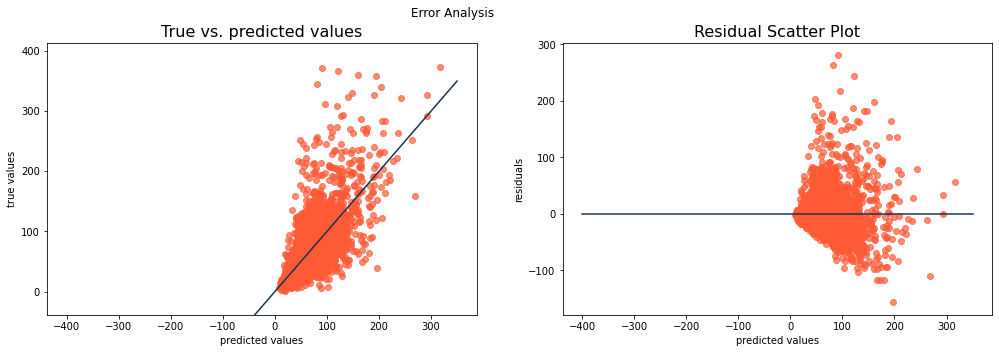

In [139]:
error_analysis(y_test, y_pred_test)

ValueError: x and y must be the same size

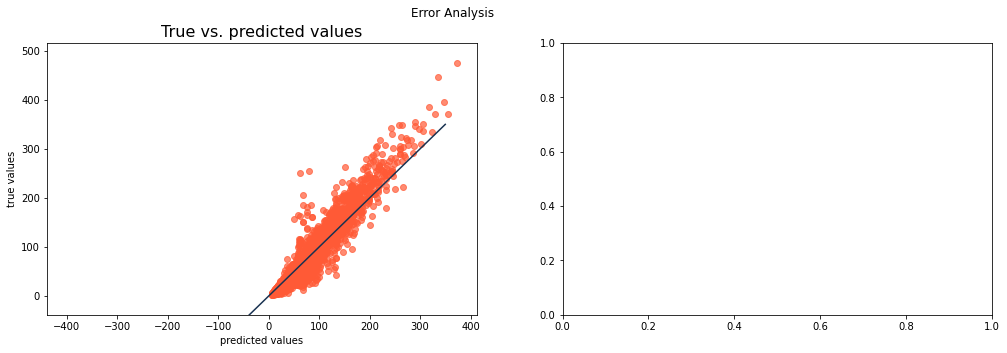

In [142]:
error_analysis(y_train,y_pred_train)

In [144]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=42,
                      verbose=10)>

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
# Defining parameter grid (as dictionary)
# Create the parameters list you wish to tune
parameters = {'n_estimators':np.arange(50, 200, 10),                               
              'min_samples_leaf' : np.arange(50, 100, 5),               
              'max_depth' : np.arange(3, 10, 1),
              "max_features":["auto", "sqrt", "log2"],
             'criterion': ["squared_error", "absolute_error", "poisson"]    
             } 


In [147]:
# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(RandomForestRegressor(random_state=RSEED), parameters, scoring='neg_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

In [149]:
#gs.fit(X_train, y_train)

Fitting 5 folds for each of 9450 candidates, totalling 47250 fits


KeyboardInterrupt: 

In [66]:
data.dtypes

location                 int64
target                 float64
max_temp               float64
min_temp               float64
mean_temp              float64
std_temp               float64
var_temp               float64
median_temp            float64
ptp_temp               float64
max_precip             float64
min_precip             float64
mean_precip            float64
std_precip             float64
var_precip             float64
median_precip          float64
ptp_precip             float64
max_rel_humidity       float64
min_rel_humidity       float64
mean_rel_humidity      float64
std_rel_humidity       float64
var_rel_humidity       float64
median_rel_humidity    float64
ptp_rel_humidity       float64
max_wind_dir           float64
min_wind_dir           float64
mean_wind_dir          float64
std_wind_dir           float64
var_wind_dir           float64
median_wind_dir        float64
ptp_wind_dir           float64
max_wind_spd           float64
min_wind_spd           float64
mean_win